In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


In [2]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
47/47 - 1s - loss: 2000.1320 - val_loss: 1774.6097
Epoch 2/1000
47/47 - 0s - loss: 1544.9615 - val_loss: 1226.5847
Epoch 3/1000
47/47 - 0s - loss: 921.4288 - val_loss: 575.7896
Epoch 4/1000
47/47 - 0s - loss: 395.2434 - val_loss: 277.5289
Epoch 5/1000
47/47 - 0s - loss: 265.7093 - val_loss: 242.4961
Epoch 6/1000
47/47 - 0s - loss: 232.8247 - val_loss: 212.2186
Epoch 7/1000
47/47 - 0s - loss: 201.3834 - val_loss: 184.1707
Epoch 8/1000
47/47 - 0s - loss: 172.8439 - val_loss: 158.9790
Epoch 9/1000
47/47 - 0s - loss: 146.3960 - val_loss: 134.3647
Epoch 10/1000
47/47 - 0s - loss: 121.5628 - val_loss: 110.3957
Epoch 11/1000
47/47 - 0s - loss: 97.3064 - val_loss: 87.8414
Epoch 12/1000
47/47 - 0s - loss: 76.0690 - val_loss: 70.8421
Epoch 13/1000
47/47 - 0s - loss: 60.0353 - val_loss: 57.2389
Epoch 14/1000
47/47 - 0s - loss: 48.5094 - val_loss: 47.8862
Epoch 15/1000
47/47 - 0s - loss: 40.7836 - val_loss: 41.0318
Epoch 16/1000
47/47 - 0s - loss: 34.8687 - val_loss: 35.0821
Epoch 17/

In [4]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.6382692108348201


In [5]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.7989175244259072


In [6]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

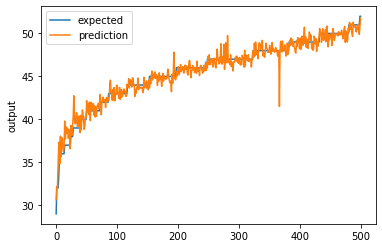

In [7]:

# Plot the chart
chart_regression(pred.flatten(),y_test)

In [10]:
x_train.shape

(1500, 53)

In [11]:
y_train

array([45, 47, 50, ..., 48, 41, 43], dtype=int64)